## Bibliotecas

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.tree import plot_tree
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

import time

## Base de Dados

A base de dados foi extraída do Sistema Gerenciador de Séries Temporais (SGS) do Banco Central, a escolha das variáveis (feature selection) é baseado em artigo presente no Relatório de Inflação de junho de 2010 que comenta sobre o uso de modelos de vetores autorregressivos para previsão de inflação e traz algumas variáveis utilizadas para rodar os modelos.

In [4]:
data = pd.read_excel(r'C:\Users\emanu\Downloads\bcb_series.xlsx')
data.tail(6)

,Data,433 - Índice nacional de preços ao consumidor-amplo (IPCA) - Var. % mensal,3695 - Taxa de câmbio - Livre - Dólar americano (compra) - Fim de período - mensal - u.m.c./US$,4189 - Taxa de juros - Selic acumulada no mês anualizada base 252 - % a.a.,4449 - Índice Nacional de Preços ao Consumidor - Amplo (IPCA) - Administrados - Var. % mensal,11428 - Índice nacional de preços ao consumidor - Amplo (IPCA) - Itens livres - Var. % mensal
861,2024-10-01 00:00:00,0.56,5.7773,10.65,0.71,0.51
862,2024-11-01 00:00:00,0.39,6.0529,11.04,-0.87,0.84
863,2024-12-01 00:00:00,0.52,6.1917,11.77,-0.17,0.76
864,2025-01-01 00:00:00,0.16,-,12.24,-1.52,0.75
865,2025-02-01 00:00:00,-,-,13.15,-,-
866,Fonte,IBGE,Sisbacen PTAX800,BCB-Demab,BCB-Depec,BCB-Depec


In [5]:
data = data.replace("-",np.nan).dropna().iloc[:-1,:] # Substituir - por NaN e dropar
data = data.iloc[-240:,:] # Selecionar últimos 20 anos
data.tail(6)

,Data,433 - Índice nacional de preços ao consumidor-amplo (IPCA) - Var. % mensal,3695 - Taxa de câmbio - Livre - Dólar americano (compra) - Fim de período - mensal - u.m.c./US$,4189 - Taxa de juros - Selic acumulada no mês anualizada base 252 - % a.a.,4449 - Índice Nacional de Preços ao Consumidor - Amplo (IPCA) - Administrados - Var. % mensal,11428 - Índice nacional de preços ao consumidor - Amplo (IPCA) - Itens livres - Var. % mensal
858,2024-07-01 00:00:00,0.38,5.6615,10.4,1.08,0.13
859,2024-08-01 00:00:00,-0.02,5.6556,10.4,-0.12,0.02
860,2024-09-01 00:00:00,0.44,5.4475,10.5,1.01,0.24
861,2024-10-01 00:00:00,0.56,5.7773,10.65,0.71,0.51
862,2024-11-01 00:00:00,0.39,6.0529,11.04,-0.87,0.84
863,2024-12-01 00:00:00,0.52,6.1917,11.77,-0.17,0.76


In [6]:
data['Data'] = pd.to_datetime(data['Data'])
data = data.set_index('Data', drop=True)
data

,433 - Índice nacional de preços ao consumidor-amplo (IPCA) - Var. % mensal,3695 - Taxa de câmbio - Livre - Dólar americano (compra) - Fim de período - mensal - u.m.c./US$,4189 - Taxa de juros - Selic acumulada no mês anualizada base 252 - % a.a.,4449 - Índice Nacional de Preços ao Consumidor - Amplo (IPCA) - Administrados - Var. % mensal,11428 - Índice nacional de preços ao consumidor - Amplo (IPCA) - Itens livres - Var. % mensal
Data,,,,,
2005-01-01,0.58,2.624,17.93,0.51,0.61
2005-02-01,0.59,2.5942,18.47,0.16,0.77
2005-03-01,0.61,2.6654,18.97,1.29,0.33
2005-04-01,0.87,2.5305,19.32,1.14,0.76
2005-05-01,0.49,2.403,19.61,0.25,0.59
...,...,...,...,...,...
2024-08-01,-0.02,5.6556,10.4,-0.12,0.02
2024-09-01,0.44,5.4475,10.5,1.01,0.24
2024-10-01,0.56,5.7773,10.65,0.71,0.51


In [7]:
data.columns = ['IPCA', 'Cambio', 'Selic', 'Precos Administrado', 'Precos Livres'] # Nome de Colunas mas inteligíveis
data.tail(6)

,IPCA,Cambio,Selic,Precos Administrado,Precos Livres
Data,,,,,
2024-07-01,0.38,5.6615,10.4,1.08,0.13
2024-08-01,-0.02,5.6556,10.4,-0.12,0.02
2024-09-01,0.44,5.4475,10.5,1.01,0.24
2024-10-01,0.56,5.7773,10.65,0.71,0.51
2024-11-01,0.39,6.0529,11.04,-0.87,0.84
2024-12-01,0.52,6.1917,11.77,-0.17,0.76


In [8]:
data = data.astype(float) # Garantido que as variáveis estejam no formato float
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 240 entries, 2005-01-01 to 2024-12-01
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   IPCA                 240 non-null    float64
 1   Cambio               240 non-null    float64
 2   Selic                240 non-null    float64
 3   Precos Administrado  240 non-null    float64
 4   Precos Livres        240 non-null    float64
dtypes: float64(5)
memory usage: 11.2 KB


<Axes: xlabel='Data'>

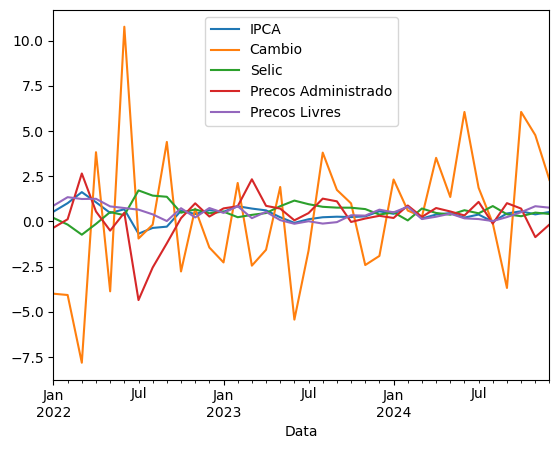

In [9]:
data['Selic'] = ((1+data['Selic']/100)**(1/12)-1)*100 - data['IPCA'] # Calculo da taxa de juros real em base mensal
data['Cambio'] = data['Cambio'].pct_change()*100
data.dropna(inplace=True)
data.tail(36).plot()

In [10]:
data.describe()

,IPCA,Cambio,Selic,Precos Administrado,Precos Livres
count,239.000000,239.000000,239.000000,239.000000,239.000000
mean,0.453180,0.460407,0.380789,0.463389,0.452092
std,0.329898,4.540386,0.452363,0.769616,0.342678
min,-0.680000,-10.719154,-1.193029,-4.350000,-0.350000
25%,0.250000,-2.528231,0.138735,0.160000,0.190000
50%,0.430000,-0.012900,0.401786,0.380000,0.430000
75%,0.610000,3.138013,0.675048,0.775000,0.685000
max,1.620000,17.133937,1.714853,3.360000,1.440000


### Variáveis Dependente e Independentes

In [12]:
colunas = data.columns
colunas

Index(['IPCA', 'Cambio', 'Selic', 'Precos Administrado', 'Precos Livres'], dtype='object')

In [13]:
X = pd.DataFrame()

for i in colunas: 
    X[f'{i} (t-1)'] = data[i].shift(1)
    X[f'{i} (t-2)'] = data[i].shift(2)
    X[f'{i} (t-3)'] = data[i].shift(3)

X.dropna(inplace=True)
X # Variáveis dependentes (Features)

,IPCA (t-1),IPCA (t-2),IPCA (t-3),Cambio (t-1),Cambio (t-2),Cambio (t-3),Selic (t-1),Selic (t-2),Selic (t-3),Precos Administrado (t-1),Precos Administrado (t-2),Precos Administrado (t-3),Precos Livres (t-1),Precos Livres (t-2),Precos Livres (t-3)
Data,,,,,,,,,,,,,,,
2005-05-01,0.87,0.61,0.59,-5.061154,2.744584,-1.135671,0.612877,0.848037,0.832435,1.14,1.29,0.16,0.76,0.33,0.77
2005-06-01,0.49,0.87,0.61,-5.038530,-5.061154,2.744584,1.013408,0.612877,0.848037,0.25,1.14,1.29,0.59,0.76,0.33
2005-07-01,-0.02,0.49,0.87,-2.222222,-5.038530,-5.061154,1.533303,1.013408,0.612877,-0.16,0.25,1.14,0.04,0.59,0.76
2005-08-01,0.25,-0.02,0.49,1.706673,-2.222222,-5.038530,1.261184,1.533303,1.013408,0.84,-0.16,0.25,0.00,0.04,0.59
2005-09-01,0.17,0.25,-0.02,-1.121480,1.706673,-2.222222,1.343303,1.261184,1.533303,0.69,0.84,-0.16,-0.05,0.00,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-01,0.38,0.21,0.46,1.856683,6.054188,1.349783,0.447908,0.617908,0.372473,1.08,0.33,0.55,0.13,0.17,0.43
2024-09-01,-0.02,0.38,0.21,-0.104213,1.856683,6.054188,0.847908,0.447908,0.617908,-0.12,1.08,0.33,0.02,0.13,0.17
2024-10-01,0.44,-0.02,0.38,-3.679539,-0.104213,1.856683,0.395516,0.847908,0.447908,1.01,-0.12,1.08,0.24,0.02,0.13


In [14]:
y = data['IPCA'].copy() # Variável independente (Target)
y

Data
2005-02-01    0.59
2005-03-01    0.61
2005-04-01    0.87
2005-05-01    0.49
2005-06-01   -0.02
              ... 
2024-08-01   -0.02
2024-09-01    0.44
2024-10-01    0.56
2024-11-01    0.39
2024-12-01    0.52
Name: IPCA, Length: 239, dtype: float64

In [15]:
X.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 236 entries, 2005-05-01 to 2024-12-01
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   IPCA (t-1)                 236 non-null    float64
 1   IPCA (t-2)                 236 non-null    float64
 2   IPCA (t-3)                 236 non-null    float64
 3   Cambio (t-1)               236 non-null    float64
 4   Cambio (t-2)               236 non-null    float64
 5   Cambio (t-3)               236 non-null    float64
 6   Selic (t-1)                236 non-null    float64
 7   Selic (t-2)                236 non-null    float64
 8   Selic (t-3)                236 non-null    float64
 9   Precos Administrado (t-1)  236 non-null    float64
 10  Precos Administrado (t-2)  236 non-null    float64
 11  Precos Administrado (t-3)  236 non-null    float64
 12  Precos Livres (t-1)        236 non-null    float64
 13  Precos Livres (t-2)        236 

In [16]:
y = y.iloc[3:] # Garantindo o mesmo número de observações
y.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 236 entries, 2005-05-01 to 2024-12-01
Series name: IPCA
Non-Null Count  Dtype  
--------------  -----  
236 non-null    float64
dtypes: float64(1)
memory usage: 3.7 KB


### Base de Treino e Teste

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

y_train

Data
2005-05-01    0.49
2005-06-01   -0.02
2005-07-01    0.25
2005-08-01    0.17
2005-09-01    0.35
              ... 
2020-08-01    0.24
2020-09-01    0.64
2020-10-01    0.86
2020-11-01    0.89
2020-12-01    1.35
Name: IPCA, Length: 188, dtype: float64

## Introdução Tree Based Models

Modelos baseados em árvores são algoritmos de aprendizado supervisionado que podem ser usados tanto para regressão quanto para classificação. Esses modelos organizam a tomada de decisão em forma de uma árvore. O processo começa no nó raiz, que recebe toda a base de treinamento (X_train). A cada divisão, o modelo escolhe uma variável (feature) e aplica uma regra de decisão para separar os dados em dois grupos, formando novos nós, a divisão continua até que um critério de parada seja atingido, como a profundidade máxima da árvore ou um número mínimo de amostras por nó. O último nó de cada ramo é chamado de nó folha, que contém a previsão final do modelo. Essa previsão representa o melhor resultado com base no critério definido, como o erro quadrático para regressão. Além disso, os hiperparâmetros do modelo influenciam a complexidade da árvore e sua capacidade de generalização.

Fontes: 
- https://scikit-learn.org/stable/modules/tree.html
- https://bookdown.org/jessicakubrusly/intr-machine-learning-i/_book/cap-arvores.html

## Decision Tree Simples

Primeiro estarei rodando o modelo sem nenhum tipo de otimização. 

In [21]:
dtree = DecisionTreeRegressor(criterion='squared_error', 
                              max_depth=3, 
                              ccp_alpha=0) 

dtree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0, max_depth=3)

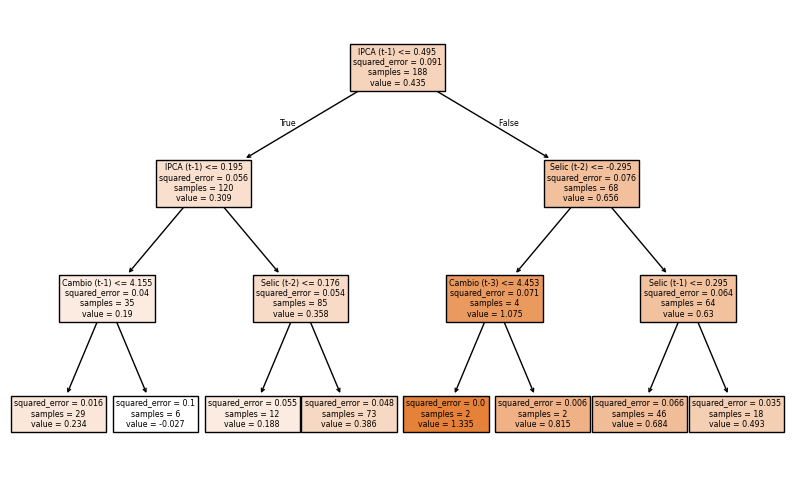

In [22]:
plt.figure(figsize=(10, 6))
plot_tree(dtree, filled=True, feature_names=X.columns)
plt.show()

In [23]:
feature_importance = pd.DataFrame({'Feature':X.columns, 
                                   'Importance':dtree.feature_importances_}
                                 ).sort_values(by='Importance', ascending=False).reset_index(drop=True)

feature_importance[:7]

,Feature,Importance
0,IPCA (t-1),0.727434
1,Selic (t-2),0.140099
2,Selic (t-1),0.057934
3,Cambio (t-1),0.041464
4,Cambio (t-3),0.033069
5,IPCA (t-2),0.000000
6,IPCA (t-3),0.000000


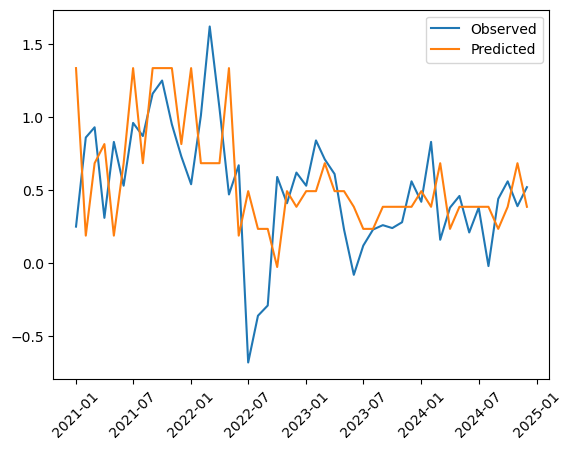

In [24]:
plt.plot(y_test, label='Observed')
plt.plot(pd.Series(dtree.predict(X_test), index=y_test.index), label='Predicted')
plt.xticks(rotation=45)
plt.legend()

## Decision Tree Otimização com Grid Search 

Modelo otimizado com Grid Search, esta técnica funciona testanto diferentes hiperparâmetros até encontrar aquele que minimiza algum critério de otimização, por exemplo, o R2. 

In [26]:
path = dtree.cost_complexity_pruning_path(X_train, y_train) # Poda da arvore, ajuda a equilibrar precisão e simplicidade
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)
print(impurities)

[0.         0.0014383  0.00180344 0.00213357 0.00251977 0.00372415
 0.00395989 0.02791485]
[0.04735633 0.04879463 0.05059807 0.05273164 0.05525142 0.05897557
 0.06293545 0.0908503 ]


In [27]:
tempo_ini = time.time()

param_grid = {
    'ccp_alpha': ccp_alphas,
    'min_impurity_decrease': [0.0, 0.01, 0.1],
    'max_depth': [15, 20, 30],
    'min_samples_split': [2, 6, 10],
    'min_samples_leaf': [5, 10, 15, 20]
}

grid_search = GridSearchCV(
    estimator = dtree,
    param_grid = param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

tempo_fim = time.time()

print("Melhores parâmetros:", grid_search.best_params_)
print("Melhor pontuação:", grid_search.best_score_)

print(f"Tempo de execução: {tempo_fim - tempo_ini} segundos")

Melhores parâmetros: {'ccp_alpha': 0.001803439192257973, 'max_depth': 20, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 15, 'min_samples_split': 10}
Melhor pontuação: 0.15453129381838265
Tempo de execução: 6.878215074539185 segundos


In [28]:
best_dtree = DecisionTreeRegressor(ccp_alpha=grid_search.best_params_['ccp_alpha'], 
                                   min_samples_leaf = grid_search.best_params_['min_samples_leaf'],
                                   min_samples_split = grid_search.best_params_['min_samples_split'],
                                   min_impurity_decrease=grid_search.best_params_['min_impurity_decrease'])

best_dtree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.001803439192257973, min_samples_leaf=15,
                      min_samples_split=10)

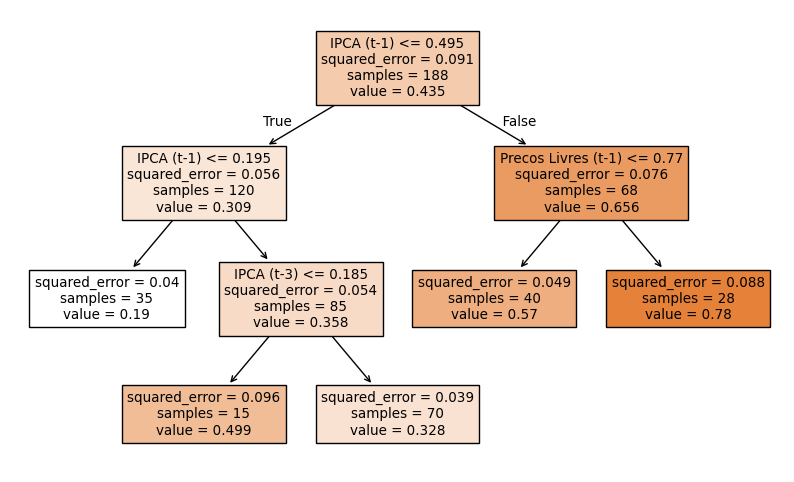

In [29]:
plt.figure(figsize=(10, 6))
plot_tree(best_dtree, filled=True, feature_names=X.columns)
plt.show()

In [30]:
feature_importance = pd.DataFrame({'Feature':X.columns, 
                                   'Importance':best_dtree.feature_importances_}
                                 ).sort_values(by='Importance', ascending=False).reset_index(drop=True)

feature_importance[:7]

,Feature,Importance
0,IPCA (t-1),0.845878
1,Precos Livres (t-1),0.102697
2,IPCA (t-3),0.051425
3,IPCA (t-2),0.000000
4,Cambio (t-1),0.000000
5,Cambio (t-2),0.000000
6,Cambio (t-3),0.000000


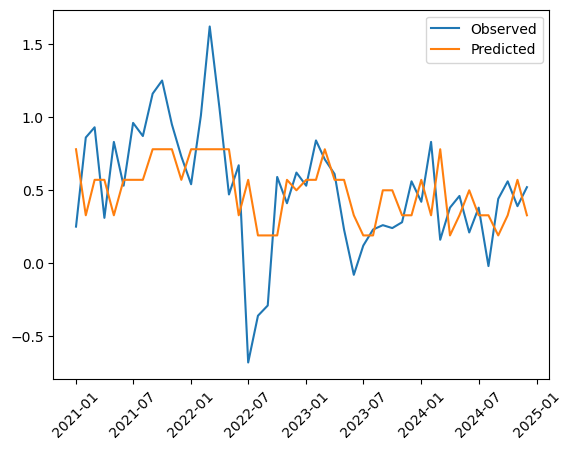

In [31]:
plt.plot(y_test, label='Observed')
plt.plot(pd.Series(best_dtree.predict(X_test), index=y_test.index), label='Predicted')
plt.xticks(rotation=45)
plt.legend()

## Random Forest

No modelo Random Forest, várias árvores de decisão são treinadas de forma independente, utilizando amostras aleatórias dos dados (bootstrap) e um subconjunto aleatório de features para cada divisão. Isso aumenta a diversidade entre as árvores, tornando o modelo mais robusto. Ao final, as previsões individuais das árvores são agregadas para formar um modelo mais forte que traga melhor precisão e menor overfitting. 

In [33]:
tempo_ini = time.time()

param_grid = {
    'n_estimators': [100, 150, 200],  
    'max_depth': [3, 5, 10],  
    'min_samples_split': [10, 15, 20],  
    'min_samples_leaf': [10, 15, 20]
}

rf_model = RandomForestRegressor(criterion='squared_error')

grid_search = GridSearchCV(estimator=rf_model, 
                           param_grid=param_grid, 
                           scoring='r2', 
                           cv=5, 
                           n_jobs=-1)

grid_search.fit(X_train, y_train.values.ravel()) 

print(grid_search)
print(grid_search.best_params_)
print(grid_search.best_score_)

best_rfmodel = grid_search.best_estimator_

tempo_fim = time.time()

print(f"Tempo de execução: {tempo_fim - tempo_ini} segundos")

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10],
                         'min_samples_leaf': [10, 15, 20],
                         'min_samples_split': [10, 15, 20],
                         'n_estimators': [100, 150, 200]},
             scoring='r2')
{'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 100}
0.2632928073224612
Tempo de execução: 15.641393423080444 segundos


In [34]:
feature_importance = pd.DataFrame({'Feature':X.columns, 
                                   'Importance':best_rfmodel.feature_importances_}
                                 ).sort_values(by='Importance', ascending=False).reset_index(drop=True)

feature_importance

,Feature,Importance
0,IPCA (t-1),0.528485
1,Precos Livres (t-1),0.178537
2,Selic (t-1),0.086858
3,Cambio (t-3),0.041679
4,Selic (t-2),0.034391
5,Precos Administrado (t-1),0.021474
6,IPCA (t-2),0.017929
7,Cambio (t-1),0.016960
8,Selic (t-3),0.016573
9,Cambio (t-2),0.015391


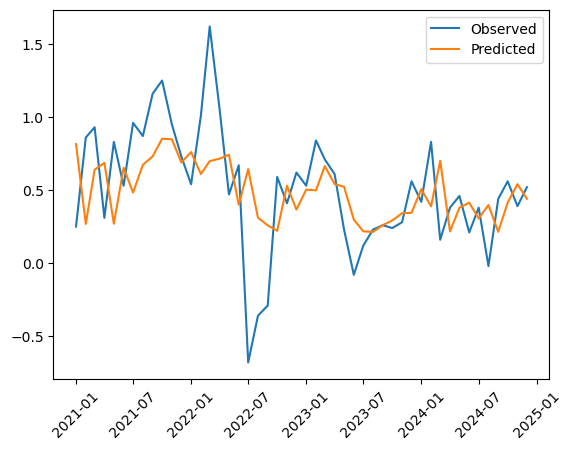

In [35]:
plt.plot(y_test, label='Observed')
plt.plot(pd.Series(best_rfmodel.predict(X_test), index=y_test.index), label='Predicted')
plt.xticks(rotation=45)
plt.legend()

## XGBoost

O XGBoost vem de "*eXtreme Gradient Boosting*" e é um modelo baseado em árvores que de forma sequencial vai treinando árvores e aperfeiçoando elas de forma sequencial visando reduzir os resíduos. A ideia é que cada árvore aprende com os erros da árvore anterior, ajustando suas previsões para reduzir a diferença entre as previsões do modelo e os valores reais, visando minimizar os resíduos de maneira em cada iteração.

In [37]:
tempo_ini = time.time()

xgb_model = XGBRegressor(objective="reg:squarederror")

param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [3, 5, 10],  
    'min_samples_split': [5, 10, 15, 20],  
    'min_samples_leaf': [5, 10, 15, 20],
    'learning_rate': [0.01, 0.05, 0.1]
}

grid_search = GridSearchCV(
    estimator=XGBRegressor(),
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print(grid_search)
print(grid_search.best_params_)
print(grid_search.best_score_)

best_xgb = grid_search.best_estimator_

tempo_fim = time.time()

print(f"Tempo de execução: {tempo_fim - tempo_ini} segundos")

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
            

C:\Users\emanu\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
C:\Users\emanu\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:08:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


In [38]:
feature_importance = pd.DataFrame({'Feature':X.columns, 
                                   'Importance':best_xgb.feature_importances_}
                                 ).sort_values(by='Importance', ascending=False).reset_index(drop=True)

feature_importance

,Feature,Importance
0,IPCA (t-1),0.232003
1,Precos Livres (t-1),0.083302
2,IPCA (t-2),0.074952
3,Selic (t-1),0.070724
4,Cambio (t-2),0.065170
5,Precos Administrado (t-1),0.052701
6,Selic (t-2),0.052604
7,Precos Livres (t-3),0.051906
8,Cambio (t-3),0.050575
9,Selic (t-3),0.050130


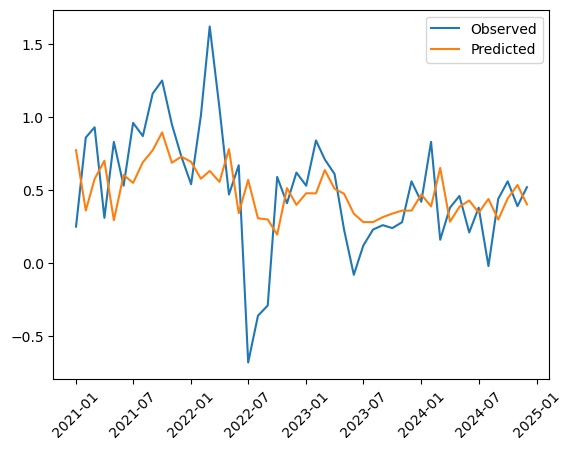

In [39]:
plt.plot(y_test, label='Observed')
plt.plot(pd.Series(best_xgb.predict(X_test), index=y_test.index), label='Predicted')
plt.xticks(rotation=45)
plt.legend()

## Comparando os Modelos

Abaixo, analisamos a capacidade do modelo de fazer previsões out-of-sample, ou seja, com dados fora da amostra de treino (X_train). Como podemos observar, o modelo conseguiu capturar parcialmente o comportamento da inflação, conforme evidenciado pelo coeficiente de determinação (R2). 

In [41]:
model_pred = round(pd.DataFrame({"Observed": y_test,
                           "Decision Tree": best_dtree.predict(X_test),
                           "Random Forest": best_rfmodel.predict(X_test),
                           "XGBoost" : best_xgb.predict(X_test)}, index=X_test.index),2)

model_pred.tail(12)

,Observed,Decision Tree,Random Forest,XGBoost
Data,,,,
2024-01-01,0.42,0.57,0.51,0.47
2024-02-01,0.83,0.33,0.39,0.39
2024-03-01,0.16,0.78,0.70,0.65
2024-04-01,0.38,0.19,0.22,0.28
2024-05-01,0.46,0.33,0.38,0.39
2024-06-01,0.21,0.50,0.41,0.43
2024-07-01,0.38,0.33,0.31,0.35
2024-08-01,-0.02,0.33,0.40,0.44
2024-09-01,0.44,0.19,0.21,0.30


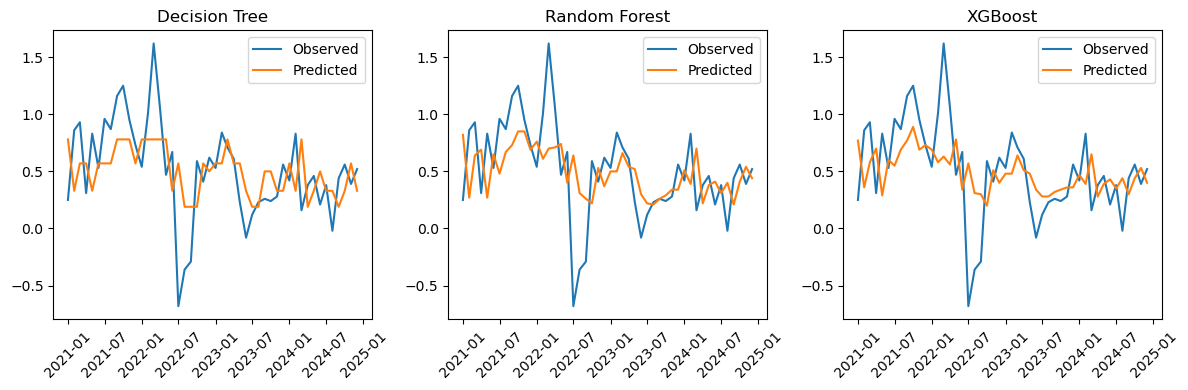

In [89]:
plt.figure(figsize=(12,4))

for n,i in enumerate(model_pred.columns[1:]):
    plt.subplot(1,3,n+1)
    plt.title(i)
    plt.plot(model_pred['Observed'], label='Observed')
    plt.plot(model_pred[i], label='Predicted')
    plt.legend()
    plt.xticks(rotation=45)

plt.tight_layout()

In [43]:
print(model_pred.columns[1], ':', r2_score(y_test, model_pred.iloc[:,1]))
print(model_pred.columns[2], ':', r2_score(y_test, model_pred.iloc[:,2]))   
print(model_pred.columns[3], ':', r2_score(y_test, model_pred.iloc[:,3]))

Decision Tree : 0.19673363653524123
Random Forest : 0.14581919354128692
XGBoost : 0.1514896205963081
